# APS1070
#### Linear Regression - Project 4

Please fill out the following:


*   Your **name**: 
*   Your **student number**: 



##**Marking Scheme:**

This project is worth **10 marks** of your final grade plus **One bonus mark**. 

There is no explicit grading for vectorized coding for this project. The vectorized coding will be tested in Q6. The grade of that question will be given based upon the ranking of your training time. **"Vectorized Coding" => "Faster Execution" => Higher Grade! :)**

This notebook is composed of two sections, a Tutorial, and an Exercise. 

The TAs in the lab will help you to complete your tutorial.


##**Important Note:**



1] Start this lab as early as possible, so that you understand concepts in Tutorial well & get enough time to implement Exercise. 
 
2] Provide a graphical representation of data wherever necessary.  

3] This Project contains 6 questions worth a total of 10 points. Because projects will help
you learn things that are complementary to what we covered in class, they should be completed on
your own. Otherwise, you will not learn from taking this course and you are harming yourself.

## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. (Optional) Replicate Linear Regression code on a blank notebook, without viewing this code. [This is called retrieval practice.](https://www.learningscientists.org/blog/2016/6/23-1)
4. Complete exercises.

## Linear Regression - Introduction

### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$y = wX + b$

This is the equation for a line that you studied in high school. w is the slope of the line and b is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of w and b, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Are we always fitting a line into the data? What if we have more than 1 feature (independant variable)?

The vectorized form of above equation is written as $y = Xw$, where y and w are vectors while X is a matrix. 

Where is the b term? It is included within the X matrix.


**Hypothesis of Linear Regression**

The linear regression model can be represented by the following equation:



#$y= w_1x_1 + w_2x_2 + ......+w_nx_n + b(1)$



The bias term can further be incorporated into the quation as an additional weight with cofficient 1

#$y= w_1x_1 + w_2x_2 + ......+w_nx_n + w_0(1)$

- Y is the predicted value ($h_w(x)$)
- w₀ is the bias term.
- w₁,…,wₙ are the model parameters
- x₁, x₂,…,xₙ are the feature values.

### LR - Procedure

Our Loss function for Linear regression would be sum of squares, which makes the cost function to be:


#$L(y,t)=\frac{1}{2}\ (y-t)^2$

Here t is the actual value and y is the predicted value. 
For the simplest case lets assume a straight line with folowing equation Lets substitute the value of y from $y = wx + b$:

#$J=\frac{1}{2N}[\sum_{i=1}^N((wx^{(i)}+b)-t^{(i)})^2]$

Partial Derivative of the above equation with respect to w is shown here:


#$\frac{{\partial J}}{\partial w}=\frac{1}{2N}[\sum_{i=0}^N2((wx^{(i)}+b
)-t^{(i)})(x^{(i)})]$

#$\frac{{\partial J}}{\partial w}=\frac{1}{N}[\sum_{i=0}^Nx^{(i)}(y^{(i)}-t^{(i)})]$

While the Partial Derivative with respect to b is shown here"

#$\frac{\partial J}{\partial b}=\frac{1}{N}[\sum_{i=0}^N(y^{(i)}-t^{(i)})]$

#### Analytical Approach for Linear Regression

Can you derive the Analytical Solution for Linear Regression?

We arrive at the analytical solution when we turn the partial derivatives with respect to the parameters to zero. Why?

This is because at the point where cost function is at the minimum with respect to the parameters (w and b), the derivative of cost function with respect to the parameters would be zero.

The solution for the general case comes out to be:

#$w = (X^TX)^{-1}X^Tt$

With $L_2$ Regularization. Cost:

#$J(w) = \frac{1}{2N}[\sum_{i=1}^N(h_w (x^{(i)}) - t^{(i)})^2 + \lambda\sum_{j=1}^nw^2_j]$ 

#$w = (X^TX + \lambda I)^{-1}X^Tt$

#### Gradient Descent Solution

Gradient descent uses the equations for gradient derived above to find the direction in which we tinker the values of our parameters w and b. 

# $w_j=w_j-\alpha*\frac{{\partial J}}{\partial w}$

# $b_j=b_j-\alpha*\frac{{\partial J}}{\partial b}$

Here the term $\alpha$ is defined as the learning rate.

#### Any other solutions methods?

Some other solution methods are QR Decomposition, Singular-Value Decomposition.

- Do these methods give exact solutions?
- Do these methods scale well with large datasets?

## Let's Start

### Analytical Approach in Code

Let's get our hands dirty.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

##### We will start with fitting distribution of data points with a line followed by higher order polynomials to visualize the idea behind it.

In [0]:
n = 5 # number of points
w = 2 # slope of line
b = 4 # y intercept of line
r = 2 # range of data on x-axis

np.random.seed(2)
x =  r*np.random.rand(n)
x.sort()
yPerf = w*x + b # perfect world: no noise
y = w*x + b + np.random.randn(n) # imperfect world: we get noisy data

Spoiler Alert: We are in an Imperfect World.

In [0]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

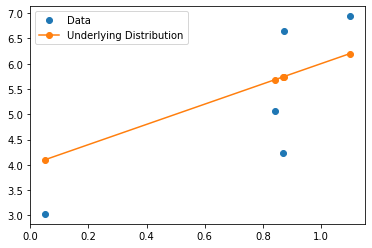

In [0]:
plt.plot(x, y, 'o', label='Data')
plt.plot(x, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
x = np.vstack((np.ones(np.shape(x)), x)).T
y = y.reshape(-1, 1)

In [0]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

# prediction
yPred = np.dot(x, W)

In [0]:
W[0],W[1]

(array([2.67741212]), array([3.35314632]))

- How similar are these to the values we had set initially?
- Will they be same as those set initially if there was no noise?

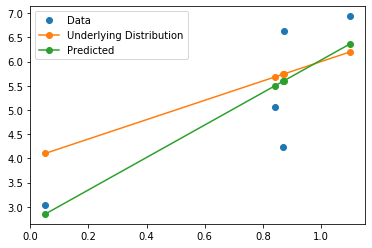

In [0]:
plt.plot(x[:, 1], y, 'o', label='Data')
plt.plot(x[:, 1], yPerf, 'o-', label='Underlying Distribution')
plt.plot(x[:, 1], yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  0.8321853483360432


### Complex Dependant Variable

It's complicated.

In [0]:
n = 20 # number of points
w = 3  # slope of line
b = 10 # y intercept of line
r = 2  # range of data on x-axis

np.random.seed(10)
X = xD = r * np.random.randn(n) # points also stored in xD (xData). will be useful later.
X.sort()
yPerf = X - 2 * (X ** 2) + 0.5 * (X ** 3)
np.random.seed(10)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(0, 5, n) # imperfect world: we get noisy data

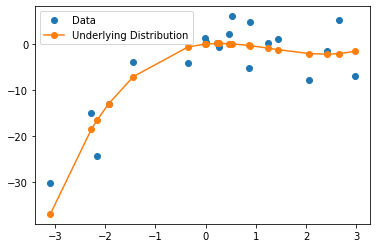

In [0]:
plt.plot(X, y, 'o', label='Data')
plt.plot(X, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
X = np.vstack((np.ones(np.shape(X)), X)).T
y = y.reshape(-1, 1)

In [0]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPredLinear = yPred = np.dot(X, W)

W

array([[-5.45917353],
       [ 3.82202654]])

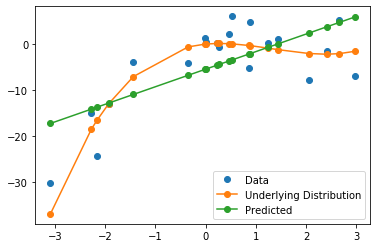

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  6.839531223681816


#### What to do next?

Can we add more features.

In [0]:
X = np.vstack((X.T, xD**2, xD**3)).T


In [0]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred4Feature = yPred = np.dot(X, W)
W

array([[ 0.04177438],
       [ 2.58652514],
       [-1.87142105],
       [ 0.19655185]])

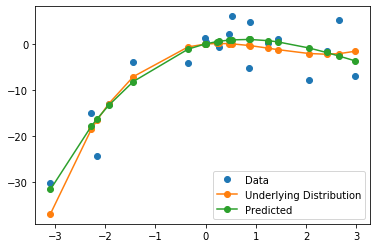

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.929493007090521


But how do we know when to stop, since we would not be knowing when to stop adding features in x.

In [0]:
X = np.vstack((X.T, xD**4, xD**5, xD**6, xD**7)).T

In [0]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred8Feature = yPred = np.dot(X, W)


In [0]:
W

array([[-2.64611130e-01],
       [ 8.28612458e+00],
       [-2.07703327e+00],
       [-6.35661778e+00],
       [-1.30720676e-02],
       [ 1.64293567e+00],
       [-2.08380043e-03],
       [-1.09229711e-01]])

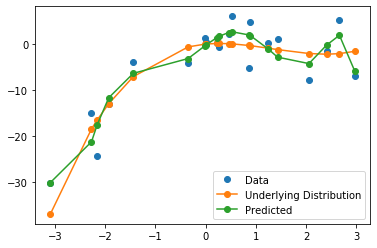

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.3097843019929725


Even though RMSE here (with much more higher features) is lower than previous case, we can see this Predicted Line is quite far from the Underlying distribution. This is called **Overfitting**.

When does the model overfits: when we have more features or comparitively less data for the model.

What exactly is overfitting:
It pays more attention to the noise of the data provided, in a sense trying to rotely memorize everything, 
without generalizing. 

Since we don't know when to stop adding features, what can be done:
- Solution is to work with a model or feature set that can slightly overfit your data, and then use techniques to prevent overfitting from happening.
The alternative gives us underfitting which we cannot fix unless you modify the feature set or model.

Options we have to prevent overfitting. Well there are many, most widely used ones are
- Using a validation set
- Regularization: add penalty on weights

In [0]:
λ = 10 # what is lambda: regularization parameter
f = 8 # number of features

In [0]:
# analytical solution
Warning = np.dot(np.linalg.inv(np.dot(X.T, X) + (λ)*np.identity(f)), np.dot(X.T, y))

# prediction
yPred8FeatRegu = yPred = np.dot(X, W)
W


array([[-2.64611130e-01],
       [ 8.28612458e+00],
       [-2.07703327e+00],
       [-6.35661778e+00],
       [-1.30720676e-02],
       [ 1.64293567e+00],
       [-2.08380043e-03],
       [-1.09229711e-01]])

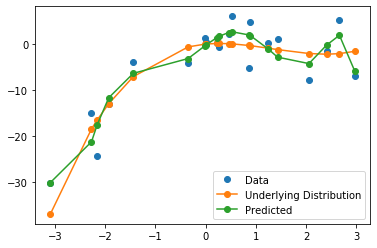

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

Can we know from the plot if the value of λ is optimal:

Somewhat but not exactly. 

To get the exact value of lambda you need to split dataset between training and testing. Then cycle over multiple values of lambda. The most optimum is the one which gives the lowest test error. 

What does low test error represent?

All models together:

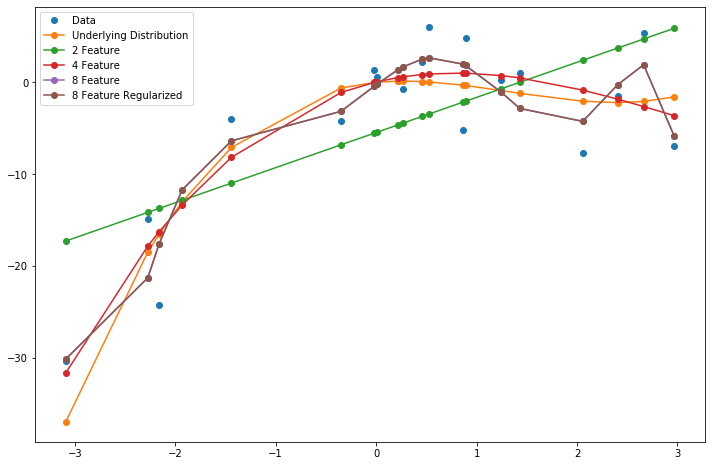

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPredLinear, 'o-', label='2 Feature')
plt.plot(xD, yPred4Feature, 'o-', label='4 Feature')
plt.plot(xD, yPred8Feature, 'o-', label='8 Feature')
plt.plot(xD, yPred8FeatRegu, 'o-', label='8 Feature Regularized')

plt.legend()
plt.show()

### Further Complex Multivariate Data

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. Three additional feature were added to this dataset using feature engineering.The objective is to predict the value of prices of the house using the given features. You can download the data by running the cell below.


In [0]:
df=pd.read_csv("https://raw.githubusercontent.com/Saket-Uoft/Data/master/data.csv")

In [0]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,New,New1,New2,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,20.31,0.0,13231.610,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,7.07,0.0,12038.120,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,7.07,0.0,7797.856,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2.18,0.0,2790.959,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,2.18,0.0,4615.700,36.2


We can see that the target value is given by name by the name MEDV 

Are there any null values in the dataset?

In [0]:
df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
New           0
New1          0
New2          0
MEDV          0
dtype: int64

Even though there are none, it's a good practice to check.

#### Exploratory Data Analysis

We here use distplot method from the seaborn library, which is another popular graphing library for Python.

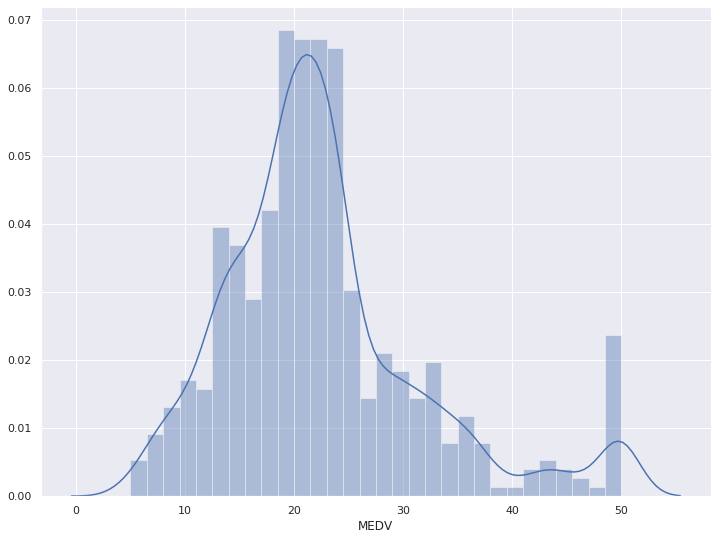

In [0]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

We can see that it mostly normally distributed with a few outliers.

## Linear Regression - Exercise

We'll work with the above dataset for the assignment below.

## Question 1 - Data Prepration [1 mark]

1. Normalize the data using StandardScaler from sklearn.
2. Split the multivariate data into training/validation data- 20% validation data, 80% training data (Note: While splitting use the value of random state=6)
3. Standardize the data.

## Question 2 - Direct Solution [1 marks]

Impelement the direct solution for linear regression on the dataset above and find best lambda.

1. Plot Train error and Validation error as a function of the lambda regularizer.
2. What is the best lambda where the best fit occurs? Use this best lambda from here on out.

## Question 3 - Gradient Descent [2 marks]

1. Implement gradient descent (full-batch) for linear regression using a fixed learning rate $\alpha$ of 1e-2. You should compute the gradients yourself!

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the direct solution with the same lambda.

## Question 4 - Mini-batch size and learning rate [2 marks]

1- Impelement Mini-batch Gradient Descent.

2- Sweep different values for the batch size with a fixed learning rate and report your findings on a plot (Training Error, Test Error,...).

3- Select the best batch sized based on fastest convergence (number of times you update the weights) and sweep the learning rate. Report your findings on a plot.


## Question 5 - Adaptive Learning rate [2 marks]

Impelement an adaptive learning rate scheme where you start a mini-batch gradient descent with a large learning rate and decrease the learning rate while you are getting closer to the local minima. 

## Question 6 - Fastest Solution! [2 +1 Bonus marks]
Less training time, More marks!

So far, you learned alot about gradient descent. 
Now consider you are an Machine learning expert working for a huge corporation. One of the most important things you will face as an ML expert is to train and develope your models as fast & accurate as possible.

 In this part we want to find a mini-batch size and a learning rate adjustment scheme to train the model quickly. Use the Python time library to measure the training time (time you spend to find the weights). Repeat every case at least 10 times and report the average time (the machine that is running your code is also performing other tasks, averaging time will help you to have a better judgment about the performance of your model). You should train your model until the loss of the model on the test set is close to direct solution with $\pm 1\%$ error. 

 Elaborate your findings with help of tables/plots.

 Report your Best time, and Accuracy!

## References

https://datascience.stackexchange.com/questions/10188/why-do-cost-functions-use-the-square-error

Linear Regression:
1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

Gradient Descent (images and equations):
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

Modified: Saket Thavanani